# CS 5483 Network Science

## Project 5 Fall 2021

### Due: December 4 (Saturday)

In [1]:
# Required Header
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## This project is on the topics covered in Chapter 9 - Module 6 Lectures

### Generate $10$ random graphs (undireted) each with $20$ nodes - Use $G(n,m)$ model; Do the steps below for $m=10, m= 20, m = 30$, and $m=100$

In [2]:
#Took one blank list for creating graphs

G = []

#will create 10 random graphs for each n = 20 and m = 10,20,30,100 
for i in range(10): 
    g1 = nx.gnm_random_graph(20, 10, directed=False)
    G.append(g1)
    g2 = nx.gnm_random_graph(20, 20, directed=False)
    G.append(g2)
    g3 = nx.gnm_random_graph(20, 30, directed=False)
    G.append(g3)
    g4 = nx.gnm_random_graph(20, 100, directed=False)
    G.append(g4)
    
#Checking the total number of random graphs 
print("The total number of random graphs is", len(G))

The total number of random graphs is 40


### Draw each of the $10$ random graphs

<ipython-input-3-a3220db1053e>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i+1)


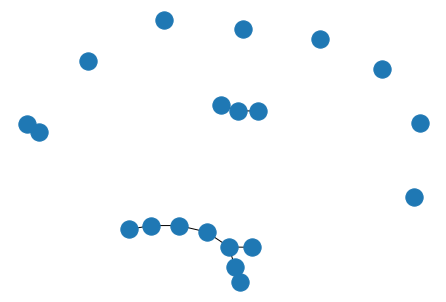

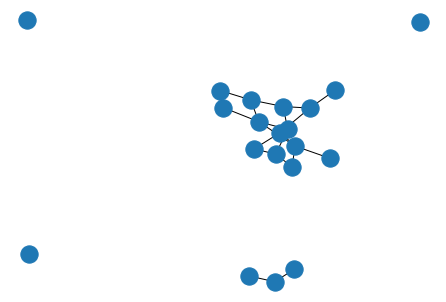

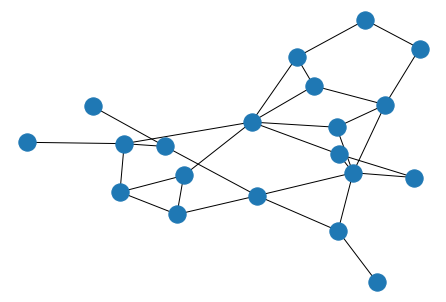

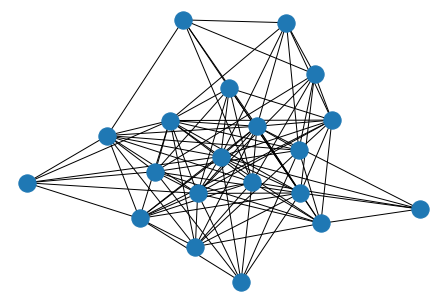

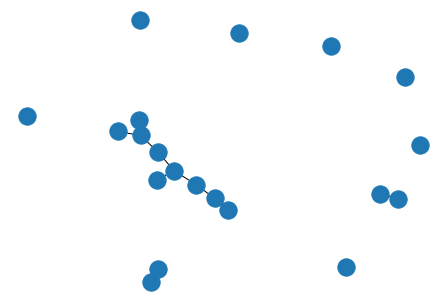

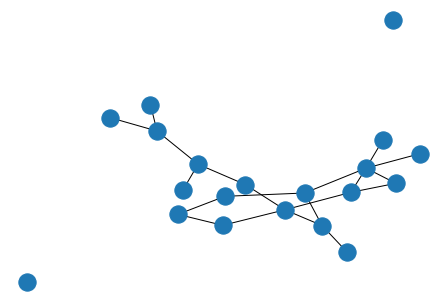

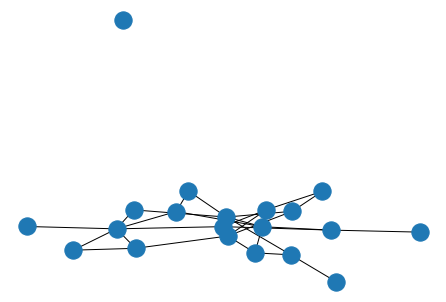

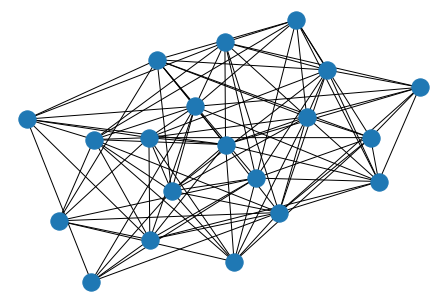

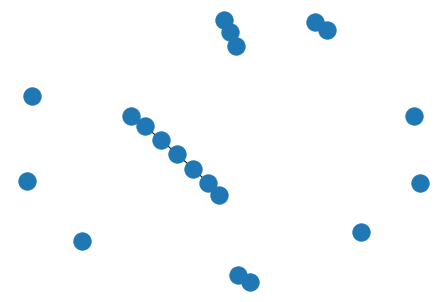

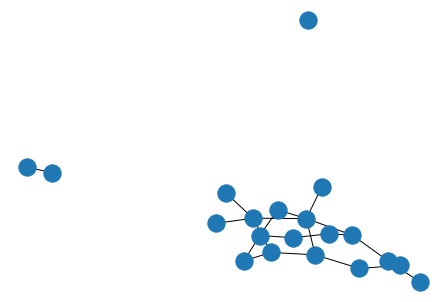

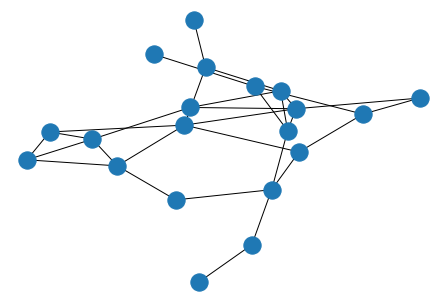

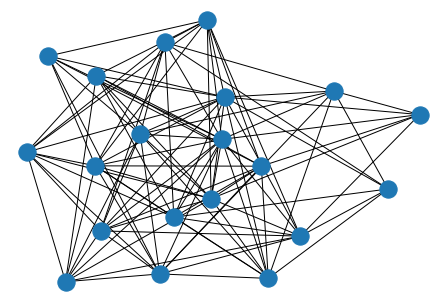

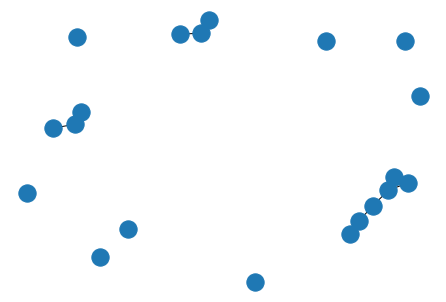

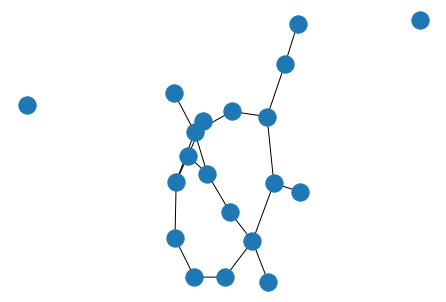

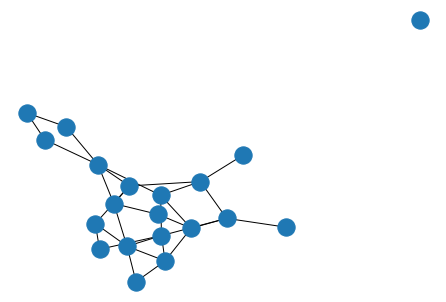

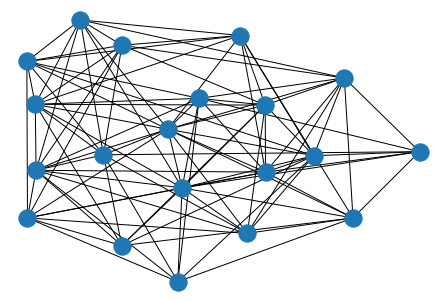

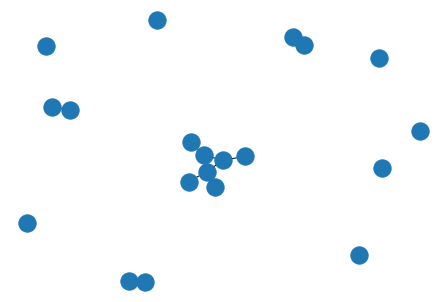

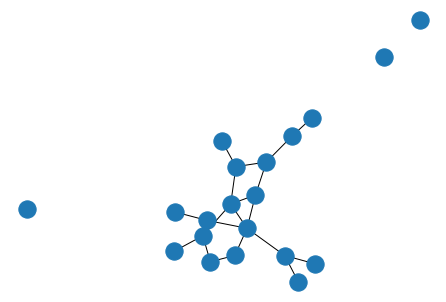

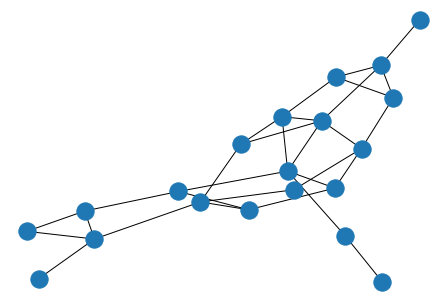

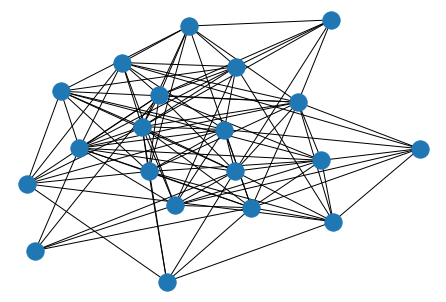

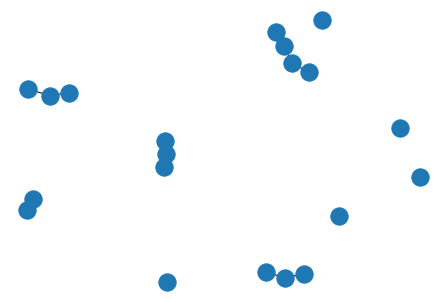

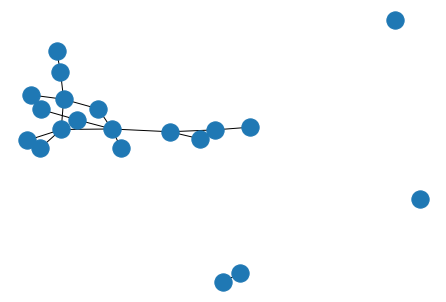

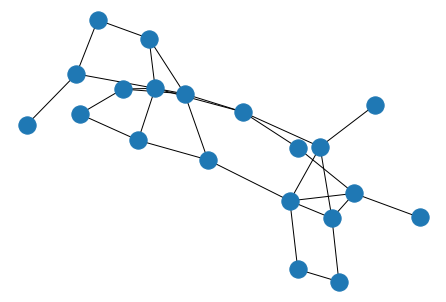

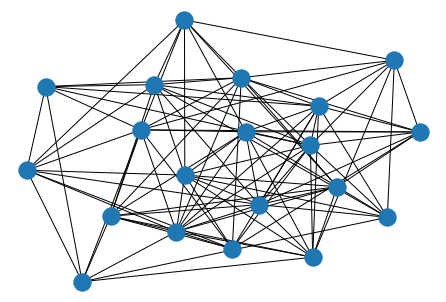

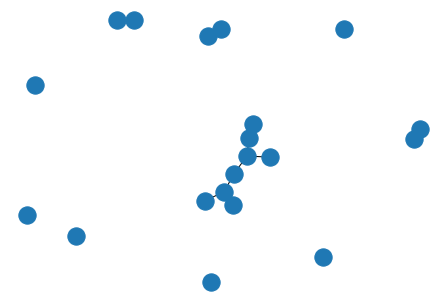

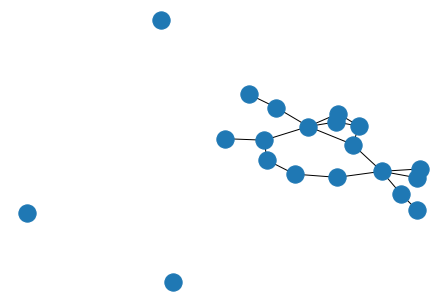

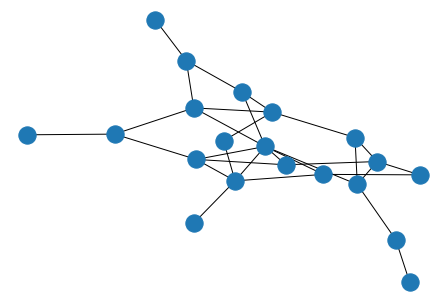

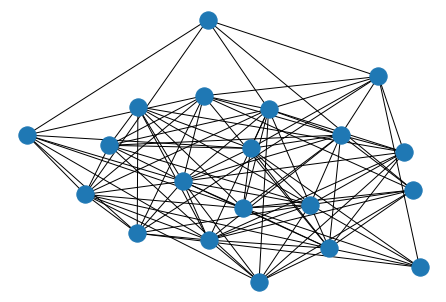

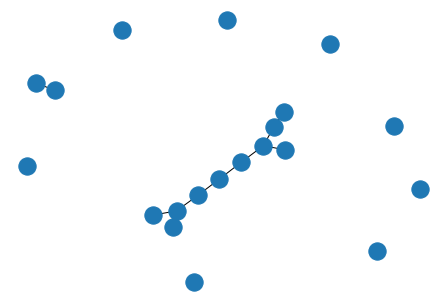

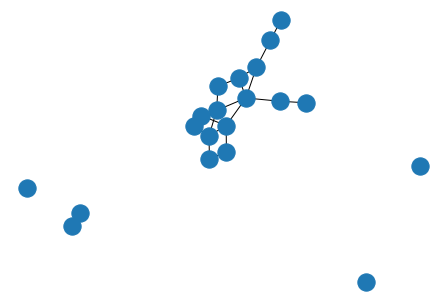

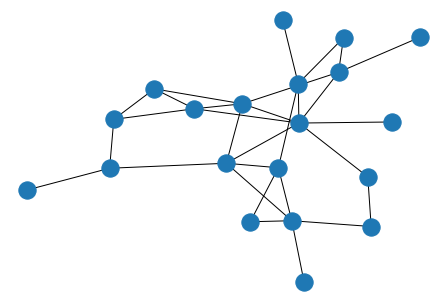

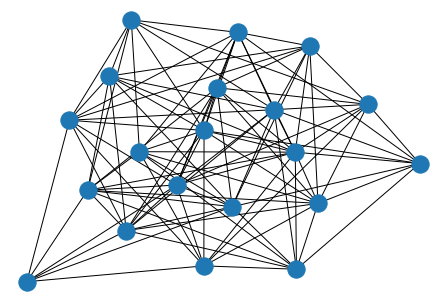

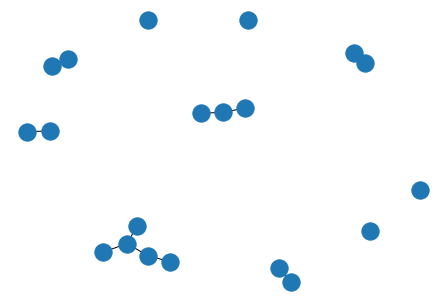

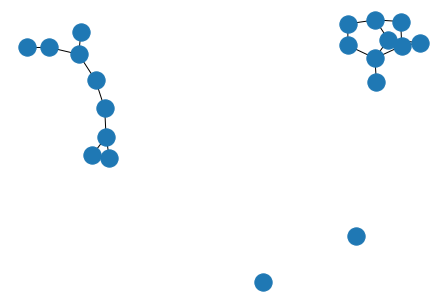

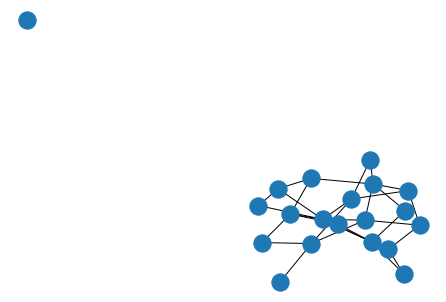

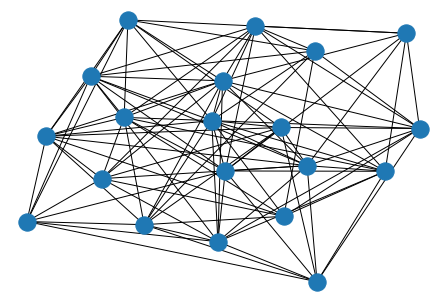

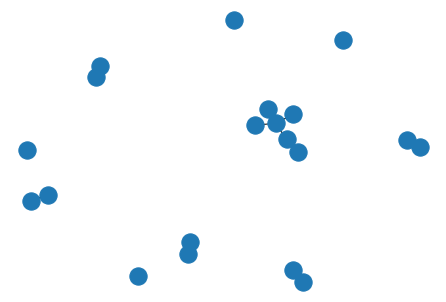

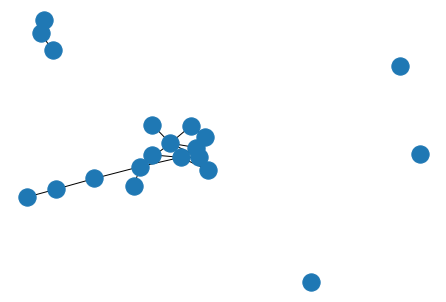

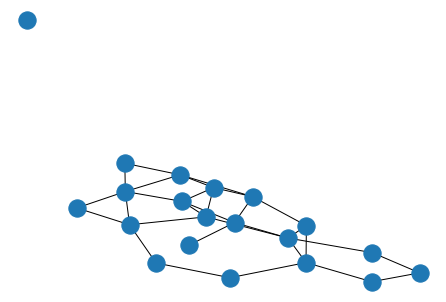

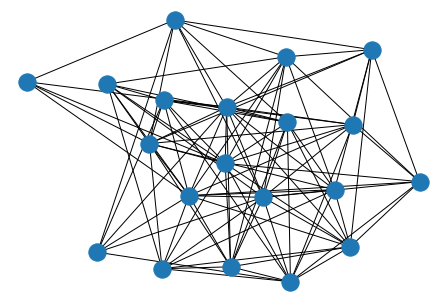

In [3]:
#drawing all the created random graphs 

for i in range(len(G)):
    plt.figure(i+1)    
    nx.draw(G[i])


### Create a Probability Matrix Q for the 10 random graphs; Calculate $Q_{ij}$ as presented in Module 6.
### The initial values of $\rho=0.3$, $\alpha=0.6$, $\beta=0.3$.

In [4]:
#Creating a 20*20 matrix for keeping all the values of probablity matrix Q
Q_ij = [ [ 0 for i in range(20) ] for j in range(20) ]


#Given values of ro, alpha and beta 
ro = 0.3 
alpha = 0.6 
beta = 0.3 

#N-ij is the number of observation of each arcs (a matrix for keeping all values)
N_ij = [ [ 0 for i in range(20) ] for j in range(20) ] 

#E_ij is 1 if I get an edge between 2 nodes (a matrix for keeping all values)
E_ij = [ [ 0 for i in range(20) ] for j in range(20) ]

#Looping over all the graphs and all the arcs 
for graph in G:     
    #Looping over all the nodes to all other nodes (i,j)
    for i in range(20):
        for j in range(20):             
            #If there is a edge between 2 nodes, then E_ij will increase by one.
            #Otherwise, as its still an observation, it will increase by 1 
            if (i,j) in graph.edges: 
                E_ij[i][j] = E_ij[i][j] + 1 
                N_ij[i][j] = N_ij[i][j] + 1 
                
            #If there is no edge between 2 nodes, then only the value of N_ij will increase by 1 
            else: 
                N_ij[i][j] = N_ij[i][j] + 1               

#Calculate the value of Q_ij for all the (i,j)                
for i in range(0,20):
    for j in range(0,20):          
        upper = ro * (alpha**E_ij[i][j])*((1-alpha)**(N_ij[i][j] - E_ij[i][j]))
        lower = (ro * (alpha**E_ij[i][j])*((1-alpha)**(N_ij[i][j] - E_ij[i][j])))+ ((1-ro) * (beta**E_ij[i][j])*((1-beta)**(N_ij[i][j] - E_ij[i][j])))
        Q_ij[i][j] = upper/lower        
print(Q_ij)   

[[8.137692352546233e-11, 6.413733065097903e-06, 6.413733065097903e-06, 5.235731300615294e-07, 6.413733065097903e-06, 5.235731300615294e-07, 1.832503556591296e-06, 1.2211624438409657e-08, 1.832503556591296e-06, 6.413733065097903e-06, 1.4959237881940133e-07, 0.0033573248685315462, 1.832503556591296e-06, 5.235731300615294e-07, 6.413733065097903e-06, 1.832503556591296e-06, 7.856256140534944e-05, 6.413733065097903e-06, 1.832503556591296e-06, 1.832503556591296e-06], [6.413733065097903e-06, 8.137692352546233e-11, 0.0002749149698582212, 1.832503556591296e-06, 5.235731300615294e-07, 0.0009615415390956791, 4.274068422960083e-08, 0.0009615415390956791, 6.413733065097903e-06, 2.244770579386044e-05, 1.832503556591296e-06, 5.235731300615294e-07, 7.856256140534944e-05, 1.4959237881940133e-07, 1.832503556591296e-06, 4.274068422960083e-08, 5.235731300615294e-07, 1.832503556591296e-06, 1.4959237881940133e-07, 6.413733065097903e-06], [6.413733065097903e-06, 0.0002749149698582212, 8.137692352546233e-11, 6

### Do the following steps a)-b) 5 times

#### a) Calculate $\alpha$, $\beta$, and $\rho$ by observing the each edge $E_{ij}$ in each of the $10$ graphs that you generated

Step - 1 

In [5]:
from math import comb

#number of nodes 
n=10

num = 0 

#for calculating the nominator of alpha and beta 

for i in range(20):
    for j in range(20):             
        if i<j: 
            num = num + E_ij[i][j]*Q_ij[i][j]

#for calculating the denominator of alpha and beta 
denum_old = 0 

for i in range(20):
    for j in range(20):             
        if i<j: 
            denum_old = denum_old + Q_ij[i][j]
denum = denum_old*40

#calculating alpha 
alpha_1 = num/denum 

#as the equation of alpha and beta is same 
beta_1= alpha_1

#calculating ro
ro_1 = denum/comb(20,2)

print(denum)
print(comb(20,2))
print(denum_old/comb(20,2))
#Printing all the new values of alpha, beta and ro --- 
print("New value of alpha is : ", alpha_1)
print("\nNew value of beta is : ", beta_1)
print("\nNew value of ro is : ", ro_1)

2.6828834659401277
190
0.00035301098236054313
New value of alpha is :  0.3777820020547642

New value of beta is :  0.3777820020547642

New value of ro is :  0.014120439294421725


#### b) Use the new values of $\alpha$, $\beta$, and $\rho$ calculated in step a) to determine new Probability Matrix Q

In [6]:
#Looping over all the graphs and all the arcs 
for graph in G:     
    #Looping over all the nodes to all other nodes (i,j)
    for i in range(20):
        for j in range(20):             
            #If there is a edge between 2 nodes, then E_ij will increase by one.
            #Otherwise, as its still an observation, it will increase by 1 
            if (i,j) in graph.edges: 
                E_ij[i][j] = E_ij[i][j] + 1 
                N_ij[i][j] = N_ij[i][j] + 1 
                
            #If there is no edge between 2 nodes, then only the value of N_ij will increase by 1 
            else: 
                N_ij[i][j] = N_ij[i][j] + 1               
              

#Calculate the value of Q_ij for all the (i,j)                
for i in range(0,20):
    for j in range(0,20):  
        
        upper_1 = ro_1 * (alpha_1**E_ij[i][j])*((1-alpha_1)**(N_ij[i][j] - E_ij[i][j]))
        lower_1 = (ro_1 * (alpha_1**E_ij[i][j])*((1-alpha_1)**(N_ij[i][j] - E_ij[i][j])))+ ((1-ro_1) * (beta_1**E_ij[i][j])*((1-beta_1)**(N_ij[i][j] - E_ij[i][j])))
        Q_ij[i][j] = upper_1/lower_1   
print(Q_ij)

[[0.014120439294421723, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421725, 0.014120439294421727, 0.014120439294421727, 0.014120439294421722, 0.014120439294421725, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421723, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727], [0.014120439294421727, 0.014120439294421723, 0.014120439294421725, 0.014120439294421727, 0.014120439294421727, 0.014120439294421723, 0.014120439294421727, 0.014120439294421723, 0.014120439294421727, 0.014120439294421725, 0.014120439294421727, 0.014120439294421727, 0.014120439294421723, 0.014120439294421722, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421727, 0.014120439294421722, 0.014120439294421727], [0.014120439294421727, 0.014120439294421725, 0.014120439294421723, 0.014120439294421727, 0.014120439294421725, 0.01

Step - 2 

In [7]:
from math import comb

#number of nodes 
n=10

num = 0 

#for calculating the nominator of alpha and beta 
for i in range(20):
    for j in range(20):             
        if i<j: 
            num = num + E_ij[i][j]*Q_ij[i][j]

#for calculating the denominator of alpha and beta 
denum_old = 0 

for i in range(20):
    for j in range(20):             
        if i<j: 
            denum_old = denum_old + Q_ij[i][j]
denum = denum_old*40

#calculating alpha 
alpha_2 = num/denum 

#as the equation of alpha and beta is same 
beta_2= alpha_2

#calculating ro
ro_2 = denum/comb(20,2)


#Printing all the new values of alpha, beta and ro --- 
print("New value of alpha is : ", alpha_2)
print("\nNew value of beta is : ", beta_2)
print("\nNew value of ro is : ", ro_2)

New value of alpha is :  0.4210526315789472

New value of beta is :  0.4210526315789472

New value of ro is :  0.5648175717768694


In [8]:
#Looping over all the graphs and all the arcs 
for graph in G: 
    
    #Looping over all the nodes to all other nodes (i,j)
    for i in range(20):
        for j in range(20): 
            
            #If there is a edge between 2 nodes, then E_ij will increase by one.
            #Otherwise, as its still an observation, it will increase by 1 
            if (i,j) in graph.edges: 
                E_ij[i][j] = E_ij[i][j] + 1 
                N_ij[i][j] = N_ij[i][j] + 1 
                
            #If there is no edge between 2 nodes, then only the value of N_ij will increase by 1 
            else: 
                N_ij[i][j] = N_ij[i][j] + 1 
              
for i in range(0,20):
    for j in range(0,20):  
        Q_ij[i][j] = (ro_2 * (alpha_2**E_ij[i][j])*((1-alpha_2)**(N_ij[i][j] - E_ij[i][j])))/((ro_2 * (alpha_2**E_ij[i][j])*((1-alpha_2)**(N_ij[i][j] - E_ij[i][j]))) + ((1 - ro_2) * (beta_2**E_ij[i][j])*((1-beta_2)**(N_ij[i][j] - E_ij[i][j]))))
print(Q_ij)

[[0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694], [0.5648175717768694, 0.5648175717768694, 0.5648175717768693, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768694, 0.5648175717768693, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694, 0.5648175717768695, 0.5648175717768694], [0.5648175717768694, 0.5648175717768693, 0.5648175717768694, 0.5648175717768694, 0.5648175717768693, 0.5648175717768695, 0.5648175717768695, 0.5648175717768694, 0.5648175717768694, 0.564817571776

In [9]:
from math import comb

num = 0 

for i in range(20):
    for j in range(20):             
        if i<j: 
            num = num + E_ij[i][j]*Q_ij[i][j]

denum_old = 0 


for i in range(20):
    for j in range(20):             
        if i<j: 
            denum_old = denum_old + Q_ij[i][j]
denum = denum_old*40

alpha_3 = num/denum 
                
beta_3= alpha_3

ro_3 = denum_old/comb(20,2)
print(denum_old)

print("New value of alpha is : ", alpha_3)
print("New value of beta is : ", beta_3)
print("New value of ro is : ", ro_3)

107.31533863760541
New value of alpha is :  0.6315789473684195
New value of beta is :  0.6315789473684195
New value of ro is :  0.5648175717768705


In [10]:
#Looping over all the graphs and all the arcs 
for graph in G: 
    
    #Looping over all the nodes to all other nodes (i,j)
    for i in range(20):
        for j in range(20): 
            
            #If there is a edge between 2 nodes, then E_ij will increase by one.
            #Otherwise, as its still an observation, it will increase by 1 
            if (i,j) in graph.edges: 
                E_ij[i][j] = E_ij[i][j] + 1 
                N_ij[i][j] = N_ij[i][j] + 1 
                
            #If there is no edge between 2 nodes, then only the value of N_ij will increase by 1 
            else: 
                N_ij[i][j] = N_ij[i][j] + 1 
               
for i in range(0,20):
    for j in range(0,20):  
        Q_ij[i][j] = (ro_3 * (alpha_3**E_ij[i][j])*((1-alpha_3)**(N_ij[i][j] - E_ij[i][j])))/((ro_3 * (alpha_3**E_ij[i][j])*((1-alpha_3)**(N_ij[i][j] - E_ij[i][j]))) + ((1 - ro_3) * (beta_3**E_ij[i][j])*((1-beta_3)**(N_ij[i][j] - E_ij[i][j]))))
print(Q_ij)


[[0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768706, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768704, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705], [0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768704, 0.5648175717768705, 0.5648175717768704, 0.5648175717768705, 0.5648175717768704, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705], [0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768704, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.5648175717768705, 0.564817571776

In [11]:
from math import comb

num = 0 


for i in range(20):
    for j in range(20):             
        if i<j: 
            num = num + E_ij[i][j]*Q_ij[i][j]

denum_old = 0 

for i in range(20):
    for j in range(20):             
        if i<j: 
            denum_old = denum_old + Q_ij[i][j]
denum = denum_old*40

alpha_4 = num/denum 
                
beta_4= alpha_4

ro_4 = denum_old /comb(20,2)
print(num)

print("New value of alpha is : ", alpha_4)
print("New value of beta is : ", beta_4)
print("New value of ro is : ", ro_4)

3614.832459371973
New value of alpha is :  0.8421052631578948
New value of beta is :  0.8421052631578948
New value of ro is :  0.5648175717768708


In [12]:
#Looping over all the graphs and all the arcs 
for graph in G: 
    
    #Looping over all the nodes to all other nodes (i,j)
    for i in range(20):
        for j in range(20): 
            
            #If there is a edge between 2 nodes, then E_ij will increase by one.
            #Otherwise, as its still an observation, it will increase by 1 
            if (i,j) in graph.edges: 
                E_ij[i][j] = E_ij[i][j] + 1 
                N_ij[i][j] = N_ij[i][j] + 1 
                
            #If there is no edge between 2 nodes, then only the value of N_ij will increase by 1 
            else: 
                N_ij[i][j] = N_ij[i][j] + 1 
                
for i in range(0,20):
    for j in range(0,20):  
        Q_ij[i][j] = (ro_4 * (alpha_4**E_ij[i][j])*((1-alpha_4)**(N_ij[i][j] - E_ij[i][j])))/((ro_4 * (alpha_4**E_ij[i][j])*((1-alpha_4)**(N_ij[i][j] - E_ij[i][j]))) + ((1 - ro_4) * (beta_4**E_ij[i][j])*((1-beta_4)**(N_ij[i][j] - E_ij[i][j]))))
print(Q_ij)

[[0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768708, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768709], [0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768706, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708], [0.5648175717768708, 0.5648175717768709, 0.5648175717768708, 0.5648175717768708, 0.5648175717768706, 0.5648175717768708, 0.5648175717768708, 0.5648175717768709, 0.5648175717768709, 0.564817571776

In [13]:
from math import comb

num = 0 


for i in range(20):
    for j in range(20):             
        if i<j: 
            num = num + E_ij[i][j]*Q_ij[i][j]

denum_old = 0 

for i in range(20):
    for j in range(20):             
        if i<j: 
            denum_old = denum_old + Q_ij[i][j]
denum = denum_old*40

alpha_5 = num/denum 
                
beta_5= alpha_5

ro_5 = denum_old/comb(20,2)
print(num)

print("New value of alpha is : ", alpha_5)
print("New value of beta is : ", beta_5)
print("New value of ro is : ", ro_5)

4518.540574214959
New value of alpha is :  1.0526315789473666
New value of beta is :  1.0526315789473666
New value of ro is :  0.5648175717768709


In [14]:
for graph in G: 
    for i in range(20):
        for j in range(20):             
            if (i,j) in graph.edges: 
                E_ij[i][j] = E_ij[i][j] + 1 
                N_ij[i][j] = N_ij[i][j] + 1 
            else: 
                N_ij[i][j] = N_ij[i][j] + 1               
for i in range(0,20):
    for j in range(0,20):  
        Q_ij[i][j] = (ro_5 * (alpha_5**E_ij[i][j])*((1-alpha_5)**(N_ij[i][j] - E_ij[i][j])))/((ro_5 * (alpha_5**E_ij[i][j])*((1-alpha_5)**(N_ij[i][j] - E_ij[i][j]))) + ((1 - ro_5) * (beta_5**E_ij[i][j])*((1-beta_5)**(N_ij[i][j] - E_ij[i][j]))))
print(Q_ij)

[[0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768708, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768708, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709], [0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.564817571776871, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768708, 0.5648175717768709, 0.5648175717768709, 0.564817571776871, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709], [0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.5648175717768709, 0.56481757177687

### Use the probability matrix Q to generate an adjacency matrix M. $M_{ij}=1$, if $Q_{ij} > 0.5$, $0$ otherwise.

In [15]:
M_ij = [ [ 0 for i in range(20) ] for j in range(20) ] 

for i in range(20):
    for j in range(20):
        if Q_ij[i][j]>0.5:
            M_ij[i][j]=1
        else: 
            M_ij[i][j]=0
print(M_ij)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 

### Use the adjacency matrix M to draw the network

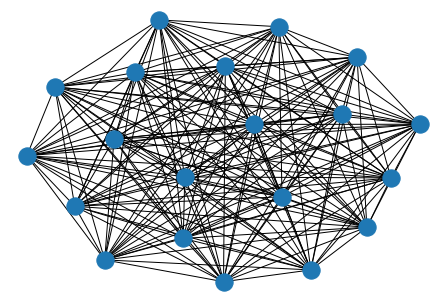

In [16]:
import numpy as np
A = np.array(M_ij)
G = nx.from_numpy_matrix(A)
nx.draw(G)